In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycountry-convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 10.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pycountry_convert as pc
import matplotlib.pyplot as plt
import geopandas as gpd
data = pd.read_csv("/content/drive/MyDrive/DIC/World Energy Consumption.csv")
pd.set_option('display.max_rows', 130)
pd.set_option('display.max_columns', 130)

##Dataset Checks:

In [ ]:
#Printing of the dataset to show that there is a NaN vals inside each column
#Also shows the shape of the dataset
data

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.60,1.519,NaN,500.231,NaN,NaN,NaN,NaN,NaN,71.03,NaN,NaN,NaN,NaN,19.268,NaN,368.65,368.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295.75,NaN,NaN,80.225,NaN,NaN,NaN,NaN,NaN,163.22,NaN,NaN,NaN,NaN,NaN,44.275,NaN,184.41,NaN,NaN,NaN,NaN,50.37,NaN,13.663,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,61.50,NaN,NaN,NaN,NaN,NaN,16.682,NaN,NaN,22.53,16.93,NaN,NaN,NaN,NaN,NaN,6.111,4.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.02,1.516,NaN,499.358,NaN,NaN,NaN,NaN,NaN,80.02,NaN,NaN,NaN,NaN,20.147,NaN,397.19,397.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.51,NaN,NaN,80.694,NaN,NaN,NaN,NaN,NaN,185.35,NaN,NaN,NaN,NaN,NaN,46.665,NaN,198.34,NaN,NaN,NaN,NaN,54.26,NaN,13.661,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,55.14,NaN,NaN,NaN,NaN,NaN,13.883,NaN,NaN,22.42,16.40,NaN,NaN,NaN,NaN,NaN,5.645,4.129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,

In [ ]:
#Printing null values of each column

null_values = data.isnull().sum()
print(null_values)

country                                             0
year                                                0
iso_code                                         5500
population                                       3889
gdp                                             10899
biofuel_cons_change_pct                         20265
biofuel_cons_change_twh                         19325
biofuel_cons_per_capita                         19710
biofuel_consumption                             19245
biofuel_elec_per_capita                         16737
biofuel_electricity                             16485
biofuel_share_elec                              16520
biofuel_share_energy                            19341
carbon_intensity_elec                           16847
coal_cons_change_pct                            16754
coal_cons_change_twh                            16697
coal_cons_per_capita                            17346
coal_consumption                                16592
coal_elec_per_capita        

##Cleaning:

In [ ]:
#deleting regions with No ISO Codes. This was done in order to clean the dataset of regions that are not considered countries
data = data.dropna(subset=['iso_code'])
print("Number of Unique Countries: ", data["country"].nunique())
print(data["country"].unique())

Number of Unique Countries:  219
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola' 'Antarctica'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Falkland Islands' 'Faroe Islands' 'Fiji' 'Finland' 'France'
 'French Guiana' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Gibraltar' 'Gr

In [ ]:
#dropping columns which contain null values above 10000
print("Original Column Length: ", len(data.columns))
num_cols = len(data.axes[1])
allowed_null_vals = 10000 #Dropped columns that were ~>50% null values
dropped_cols = []

for i in range(num_cols):
    curr_col = data.iloc[:,i]
    null_vals = curr_col.isnull().sum()
    if null_vals >= allowed_null_vals:
      col_name = data.columns[i]
      dropped_cols.append(col_name)

data = data.drop(columns=dropped_cols, axis=1)
print("Dropped Column Length: ", len(data.columns))
null_values = data.isnull().sum()
print(null_values)

Original Column Length:  129
Dropped Column Length:  27
country                                0
year                                   0
iso_code                               0
population                           116
gdp                                 5642
coal_prod_change_twh                3766
coal_prod_per_capita                3550
coal_production                     3550
energy_cons_change_pct              6969
energy_cons_change_twh              6817
energy_per_capita                   6670
energy_per_gdp                      9361
gas_prod_change_twh                 3594
gas_prod_per_capita                 3378
gas_production                      3378
hydro_elec_per_capita               9337
hydro_electricity                   9337
low_carbon_elec_per_capita          9306
low_carbon_electricity              9306
nuclear_elec_per_capita             9567
nuclear_electricity                 9567
oil_prod_change_twh                 3121
oil_prod_per_capita                 2905
o

In [ ]:
data

,country,year,iso_code,population,gdp,coal_prod_change_twh,coal_prod_per_capita,coal_production,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,gas_prod_change_twh,gas_prod_per_capita,gas_production,hydro_elec_per_capita,hydro_electricity,low_carbon_elec_per_capita,low_carbon_electricity,nuclear_elec_per_capita,nuclear_electricity,oil_prod_change_twh,oil_prod_per_capita,oil_production,other_renewable_electricity,other_renewables_elec_per_capita,primary_energy_consumption
23,Afghanistan,1900,AFG,4707744.0,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Afghanistan,1901,AFG,4751177.0,NaN,0.000,0.000,0.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Afghanistan,1902,AFG,4802500.0,NaN,0.000,0.000,0.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Afghanistan,1903,AFG,4861833.0,NaN,0.000,0.000,0.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Afghanistan,1904,AFG,4921891.0,NaN,0.000,0.000,0.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22007,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,3.148,1667.861,25.105,14.479,6.553,3441.986,2.281,NaN,NaN,NaN,335.499,5.05,362.738,5.46,0.0,0.0,NaN,NaN,NaN,0.39,25.910,51.809
22008,Zimbabwe,2019,ZWE,15354606.0,NaN,-5.405,1283.004,19.700,-10.982,-5.689,3003.655,NaN,NaN,NaN,NaN,271.580,4.17,298.282,4.58,0.0,0.0,NaN,NaN,NaN,0.38,24.748,46.120
22009,Zimbabwe,2020,ZWE,15669663.0,NaN,0.592,1294.978,20.292,-8.940,-4.123,2680.132,NaN,NaN,NaN,NaN,243.145,3.81,267.396,4.19,0.0,0.0,NaN,NaN,NaN,0.35,22.336,41.997
22010,Zimbabwe,2021,ZWE,15993525.0,NaN,3.999,1518.799,24.291,0.354,0.149,2635.154,NaN,NaN,NaN,NaN,250.101,4.00,276.362,4.42,0.0,0.0,NaN,NaN,NaN,0.38,23.760,42.145


In [ ]:
#Dropped the iso_code column
data = data.drop('iso_code', axis=1)
data = data.reset_index(drop=True)

In [ ]:
#Interpolating to fill NaN values inside the population column
data['population'] = data.groupby('country')['population'].transform(lambda x: x.interpolate())

In [ ]:
#Check to see if there are any regions that missed the previous cleaning
print(data['population'].isnull().sum())
null_population = data[data['population'].isnull()]
print(null_population)

42
        country  year  population  gdp  coal_prod_change_twh  \
532  Antarctica  1980         NaN  NaN                   NaN   
533  Antarctica  1981         NaN  NaN                   NaN   
534  Antarctica  1982         NaN  NaN                   NaN   
535  Antarctica  1983         NaN  NaN                   NaN   
536  Antarctica  1984         NaN  NaN                   NaN   
537  Antarctica  1985         NaN  NaN                   NaN   
538  Antarctica  1986         NaN  NaN                   NaN   
539  Antarctica  1987         NaN  NaN                   NaN   
540  Antarctica  1988         NaN  NaN                   NaN   
541  Antarctica  1989         NaN  NaN                   NaN   
542  Antarctica  1990         NaN  NaN                   NaN   
543  Antarctica  1991         NaN  NaN                   NaN   
544  Antarctica  1992         NaN  NaN                   NaN   
545  Antarctica  1993         NaN  NaN                   NaN   
546  Antarctica  1994         NaN  Na

In [ ]:
#Drops Antarctica completely from the dataset
data = data[data['country'] != 'Antarctica']
data.isnull().sum()

country                                0
year                                   0
population                             0
gdp                                 5600
coal_prod_change_twh                3724
coal_prod_per_capita                3508
coal_production                     3508
energy_cons_change_pct              6968
energy_cons_change_twh              6816
energy_per_capita                   6628
energy_per_gdp                      9319
gas_prod_change_twh                 3552
gas_prod_per_capita                 3336
gas_production                      3336
hydro_elec_per_capita               9295
hydro_electricity                   9295
low_carbon_elec_per_capita          9264
low_carbon_electricity              9264
nuclear_elec_per_capita             9525
nuclear_electricity                 9525
oil_prod_change_twh                 3079
oil_prod_per_capita                 2863
oil_production                      2863
other_renewable_electricity         9921
other_renewables

In [ ]:
#Droped remaining rows within gdp that have NaN values
df_dropped_gdp = data.dropna(subset=['gdp'])

In [ ]:
#Saves the remaining columns that have null values greater than 0 and not the gdp column to a list
#Then interpolates, forward fills, and backward fills through each column in that list
num_cols = len(df_dropped_gdp.axes[1])
fill_columns = []
for i in range(num_cols):
    curr_col = data.iloc[:,i]
    null_vals = curr_col.isnull().sum()
    col_name = data.columns[i]
    if null_vals > 0 and col_name != 'gdp':
        fill_columns.append(col_name)


print("Cols: ", fill_columns)
pd.options.mode.chained_assignment = None

for column in fill_columns:
    df_dropped_gdp[column] = df_dropped_gdp.groupby('country',group_keys = False)[column].apply(lambda x: x.interpolate())

for column in fill_columns:
    df_dropped_gdp[column] = df_dropped_gdp.groupby('country',group_keys = False)[column].ffill().bfill()

Cols:  ['coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production', 'energy_cons_change_pct', 'energy_cons_change_twh', 'energy_per_capita', 'energy_per_gdp', 'gas_prod_change_twh', 'gas_prod_per_capita', 'gas_production', 'hydro_elec_per_capita', 'hydro_electricity', 'low_carbon_elec_per_capita', 'low_carbon_electricity', 'nuclear_elec_per_capita', 'nuclear_electricity', 'oil_prod_change_twh', 'oil_prod_per_capita', 'oil_production', 'other_renewable_electricity', 'other_renewables_elec_per_capita', 'primary_energy_consumption']


In [ ]:
#Checks to see if there are any more null values in the dataset
df_dropped_gdp.isnull().sum()

country                             0
year                                0
population                          0
gdp                                 0
coal_prod_change_twh                0
coal_prod_per_capita                0
coal_production                     0
energy_cons_change_pct              0
energy_cons_change_twh              0
energy_per_capita                   0
energy_per_gdp                      0
gas_prod_change_twh                 0
gas_prod_per_capita                 0
gas_production                      0
hydro_elec_per_capita               0
hydro_electricity                   0
low_carbon_elec_per_capita          0
low_carbon_electricity              0
nuclear_elec_per_capita             0
nuclear_electricity                 0
oil_prod_change_twh                 0
oil_prod_per_capita                 0
oil_production                      0
other_renewable_electricity         0
other_renewables_elec_per_capita    0
primary_energy_consumption          0
dtype: int64

In [ ]:
#Resets the data index
df = df_dropped_gdp.reset_index(drop=True)
df.isnull().sum()

country                             0
year                                0
population                          0
gdp                                 0
coal_prod_change_twh                0
coal_prod_per_capita                0
coal_production                     0
energy_cons_change_pct              0
energy_cons_change_twh              0
energy_per_capita                   0
energy_per_gdp                      0
gas_prod_change_twh                 0
gas_prod_per_capita                 0
gas_production                      0
hydro_elec_per_capita               0
hydro_electricity                   0
low_carbon_elec_per_capita          0
low_carbon_electricity              0
nuclear_elec_per_capita             0
nuclear_electricity                 0
oil_prod_change_twh                 0
oil_prod_per_capita                 0
oil_production                      0
other_renewable_electricity         0
other_renewables_elec_per_capita    0
primary_energy_consumption          0
dtype: int64

In [ ]:
#Clips the outliers in the dataset using z-score
#Gets a list of countries and then iterates through each column in that country calculating the zscores for each column
countries = df["country"].unique()

for country in countries:
  df_country = df[df["country"] == country]
  corr_cols = df_country.iloc[:,3:]
  mean = corr_cols.mean()
  std = corr_cols.std()
  zscore = stats.zscore(corr_cols)
  zscore_df = pd.DataFrame(zscore, index=corr_cols.index, columns=corr_cols.columns)
  zscore_capped = zscore_df.clip(lower=-3, upper=3)
  data_capped = mean + zscore_capped*std
  df.update(data_capped)

In [ ]:
#Gets a list of columns that have an object datatype. This datatype could be mixed with multiple datatypes
#The list of columns is then iterated through and the correct datatype is assigned to each row in the column

num_cols = len(df_dropped_gdp.axes[1])
df['gdp'].iloc[0]

mixed_cols = df.dtypes[df.dtypes == 'object'].index.tolist()

for mixed_col in mixed_cols:
  col = df[mixed_col]
  col_type = type(col.iloc[0])
  for i, row in col.items():
    if type(row) != col_type:
      df.at[i, mixed_col] = col_type(row)

In [ ]:
#Caps the float64 columns to 3 decimal places

float_cols = df.dtypes[df.dtypes == 'float64'].index.tolist()

for float_col in float_cols:
  df[float_col] = df[float_col].round(3)

cleaned_csv = df

In [ ]:
#Shows the cleaned dataset
# cleaned_csv = df
# cleaned_csv

In [ ]:
#Uses a regular expression to parse columns with strings in them
str_cols = cleaned_csv.dtypes[cleaned_csv.dtypes == 'O'].index.tolist()

for str_col in str_cols:
  cleaned_csv[str_col] = cleaned_csv[str_col].str.replace(r'[^\w\s]', '', regex=True)

In [ ]:
# import pandas as pd
# cleaned_csv = pd.read_csv('cleaned_data.csv')
# cleaned_csv

In [ ]:
# cleaned_csv['country'].unique()

In [ ]:
#Creates a column where it groups the country into the continent it is located on
def country_to_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        continent_map = {'AS': 'Asia', 'NA': 'North America', 'EU': 'Europe', 'AF': 'Africa', 'OC': 'Oceania', 'SA': 'South America', 'AN': 'Antarctica'}
        return continent_map[continent_name]
    except:
        return None
cleaned_csv['continent'] = cleaned_csv['country'].apply(country_to_continent)

/usr/local/lib/python3.10/dist-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/usr/local/lib/python3.10/dist-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


In [ ]:
cleaned_csv['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'South America', 'Oceania',
       'North America', None], dtype=object)

In [ ]:
#Checks to see if any of the countries have a null value for the continent column
none_continent_countries = cleaned_csv[cleaned_csv['continent'].isnull()]

for country in none_continent_countries['country'].unique():
    print(country)

Cote dIvoire
Democratic Republic of Congo
GuineaBissau


In [ ]:
#Puts the remaining countries into their respective continent
countries_to_update = ['Cote dIvoire', 'Democratic Republic of Congo', 'GuineaBissau']

cleaned_csv.loc[cleaned_csv['country'].isin(countries_to_update), 'continent'] = 'Africa'

In [ ]:
#Prints the number of continent values and also prints the cleaned dataset
cleaned_csv

,country,year,population,gdp,coal_prod_change_twh,coal_prod_per_capita,coal_production,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,gas_prod_change_twh,gas_prod_per_capita,gas_production,hydro_elec_per_capita,hydro_electricity,low_carbon_elec_per_capita,low_carbon_electricity,nuclear_elec_per_capita,nuclear_electricity,oil_prod_change_twh,oil_prod_per_capita,oil_production,other_renewable_electricity,other_renewables_elec_per_capita,primary_energy_consumption,continent
0,Afghanistan,1950,7480464.0,9.333172e+09,0.072,14.747,0.103,12.685,0.988,622.683,0.507,-0.0,-6.846,-0.078,15.842,0.309,15.841,0.309,0.0,0.0,0.0,0.0,0.0,0.000,0.000,7.753,Asia
1,Afghanistan,1951,7571542.0,9.606036e+09,0.007,15.646,0.111,12.685,0.988,622.683,0.507,-0.0,-6.846,-0.078,15.842,0.309,15.841,0.309,0.0,0.0,0.0,0.0,0.0,0.000,0.000,7.753,Asia
2,Afghanistan,1952,7667534.0,9.933463e+09,0.015,17.582,0.127,12.685,0.988,622.683,0.507,-0.0,-6.846,-0.078,15.842,0.309,15.841,0.309,0.0,0.0,0.0,0.0,0.0,0.000,0.000,7.753,Asia
3,Afghanistan,1953,7764549.0,1.055115e+10,-0.010,16.299,0.119,12.685,0.988,622.683,0.507,-0.0,-6.846,-0.078,15.842,0.309,15.841,0.309,0.0,0.0,0.0,0.0,0.0,0.000,0.000,7.753,Asia
4,Afghanistan,1954,7864289.0,1.078872e+10,-0.010,15.041,0.111,12.685,0.988,622.683,0.507,-0.0,-6.846,-0.078,15.842,0.309,15.841,0.309,0.0,0.0,0.0,0.0,0.0,0.000,0.000,7.753,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10865,Zimbabwe,2014,13855758.0,2.126495e+10,19.433,3123.225,43.483,-1.414,-0.782,3931.859,2.573,0.0,0.000,0.000,388.937,5.393,418.605,5.804,0.0,0.0,0.0,0.0,0.0,0.411,29.668,54.660,Africa
10866,Zimbabwe,2015,14154937.0,2.106848e+10,-10.927,2284.698,32.557,0.081,0.045,3851.307,2.599,0.0,0.000,0.000,349.358,4.949,379.819,5.381,0.0,0.0,0.0,0.0,0.0,0.418,29.750,54.708,Africa
10867,Zimbabwe,2016,14452705.0,2.100234e+10,-12.348,1382.734,20.210,-14.756,-7.864,3213.428,2.222,0.0,0.000,0.000,203.416,2.945,229.065,3.316,0.0,0.0,0.0,0.0,0.0,0.361,24.952,46.647,Africa
10868,Zimbabwe,2017,14751101.0,2.199560e+10,1.708,1470.047,21.919,-3.011,-1.404,3052.589,2.058,0.0,0.000,0.000,268.910,3.972,291.306,4.303,0.0,0.0,0.0,0.0,0.0,0.321,21.712,45.245,Africa


In [ ]:
# # Assuming 'year' is an integer column in your DataFrame df
cleaned_csv['year'] = pd.to_datetime(cleaned_csv['year'], format='%Y')
cleaned_csv

In [ ]:
print("Continent Value Count:\n", cleaned_csv['continent'].value_counts())
print("\nContinent Unique Value Count:\n",cleaned_csv.groupby('continent')['country'].nunique())

Continent Value Count:
 Asia             2937
Europe           2890
Africa           2635
North America    1140
South America    1030
Oceania           238
Name: continent, dtype: int64

Continent Unique Value Count:
 continent
Africa           50
Asia             46
Europe           39
North America    18
Oceania           2
South America    10
Name: country, dtype: int64


In [ ]:
#Focuses the continentas to North America and South America
continents_to_include = ['North America', 'South America']
cleaned_csv_specific_continents = cleaned_csv.loc[cleaned_csv['continent'].isin(continents_to_include)]

In [ ]:
#Shows the focused data set
cleaned_csv_specific_continents

,country,year,population,gdp,coal_prod_change_twh,coal_prod_per_capita,coal_production,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,gas_prod_change_twh,gas_prod_per_capita,gas_production,hydro_elec_per_capita,hydro_electricity,low_carbon_elec_per_capita,low_carbon_electricity,nuclear_elec_per_capita,nuclear_electricity,oil_prod_change_twh,oil_prod_per_capita,oil_production,other_renewable_electricity,other_renewables_elec_per_capita,primary_energy_consumption,continent
281,Argentina,1900,4685089.0,2.046512e+10,-0.000,-0.178,-0.005,3.243,10.644,14890.610,1.452,-0.014,-12.497,-0.440,54.605,1.189,-1.048,-0.040,-0.254,-0.009,-0.011,-23.471,-0.716,-0.001,-0.021,327.976,South America
282,Argentina,1901,4855502.0,2.133270e+10,-0.000,-0.178,-0.005,3.243,10.644,14890.610,1.452,-0.014,-12.497,-0.440,54.605,1.189,-1.048,-0.040,-0.254,-0.009,-0.011,-23.471,-0.716,-0.001,-0.021,327.976,South America
283,Argentina,1902,5036658.0,2.087368e+10,-0.000,-0.178,-0.005,3.243,10.644,14890.610,1.452,-0.014,-12.497,-0.440,54.605,1.189,-1.048,-0.040,-0.254,-0.009,-0.011,-23.471,-0.716,-0.001,-0.021,327.976,South America
284,Argentina,1903,5229108.0,2.402843e+10,-0.000,-0.178,-0.005,3.243,10.644,14890.610,1.452,-0.014,-12.497,-0.440,54.605,1.189,-1.048,-0.040,-0.254,-0.009,-0.011,-23.471,-0.716,-0.001,-0.021,327.976,South America
285,Argentina,1904,5428911.0,2.672760e+10,-0.000,-0.178,-0.005,3.243,10.644,14890.610,1.452,-0.014,-12.497,-0.440,54.605,1.189,-1.048,-0.040,-0.254,-0.009,-0.011,-23.471,-0.716,-0.001,-0.021,327.976,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10618,Venezuela,2014,30193260.0,6.002817e+11,-3.655,224.448,6.787,-3.997,-40.872,32596.011,1.643,12.016,10547.498,318.750,2113.383,63.838,2116.750,63.932,0.000,0.000,8.477,53219.591,1613.371,0.000,0.000,985.604,South America
10619,Venezuela,2015,30529722.0,5.606408e+11,0.009,222.252,6.796,-1.418,-13.894,31781.294,1.734,42.938,11837.775,361.698,2435.434,74.382,2439.096,74.486,0.000,0.000,106.345,56113.609,1719.751,0.000,0.000,971.733,South America
10620,Venezuela,2016,30741464.0,4.577605e+11,-0.447,206.158,6.349,-9.334,-69.583,27475.727,1.850,11.775,12139.484,373.485,2032.512,62.512,2036.152,62.616,0.000,0.000,-175.952,50002.185,1543.835,0.000,0.000,846.124,South America
10621,Venezuela,2017,30563430.0,3.859235e+11,-0.249,199.229,6.100,0.799,6.785,27859.093,2.213,13.714,12659.388,387.210,1984.572,60.685,1988.231,60.789,0.000,0.000,-222.006,43032.872,1321.863,0.000,0.000,852.932,South America


In [ ]:
#Saves the cleaned dataset to a csv file
csv_file_path = '/content/drive/MyDrive/DIC/cleaned_data.csv'
cleaned_csv.to_csv(csv_file_path, index=False)

In [ ]:
#Saves the focused dataset to a csv file
csv_file_path = '/content/drive/MyDrive/DIC/cleaned_data_specific_continents.csv'
cleaned_csv_specific_continents.to_csv(csv_file_path, index=False)

##Exploratory Data Analysis

In [ ]:
#Shows the general statistics of the dataset
cleaned_csv_specific_continents.describe()

,year,population,gdp,coal_prod_change_twh,coal_prod_per_capita,coal_production,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,gas_prod_change_twh,gas_prod_per_capita,gas_production,hydro_elec_per_capita,hydro_electricity,low_carbon_elec_per_capita,low_carbon_electricity,nuclear_elec_per_capita,nuclear_electricity,oil_prod_change_twh,oil_prod_per_capita,oil_production,other_renewable_electricity,other_renewables_elec_per_capita,primary_energy_consumption
count,2170.000000,2.170000e+03,2.170000e+03,2170.000000,2170.000000,2170.000000,2170.000000,2170.00000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000
mean,1970.445622,2.533447e+07,4.550474e+11,1.707614,2345.474274,259.336830,4.576671,41.04332,20449.563983,1.628132,5.520840,5335.264606,229.780535,1009.602261,35.608596,779.772255,37.169175,101.157019,14.562614,6.922228,11085.836196,353.363348,2.403186,38.420017,1303.808649
std,33.957368,5.052151e+07,1.773466e+12,89.173953,6556.804464,1027.135147,8.263905,165.49628,27636.466988,1.096214,44.080865,23248.221364,920.176626,2217.558835,79.447476,2244.921401,158.099208,473.717913,92.006439,56.411377,28540.085566,964.044000,9.316487,72.643687,4260.576514
min,1900.000000,6.817100e+04,1.608543e+08,-1126.270000,-13.003000,-0.509000,-36.288000,-857.41400,382.382000,0.313000,-485.574000,-82.306000,-2.337000,0.000000,0.000000,-11.193000,-0.421000,-0.254000,-0.010000,-350.986000,-358.117000,-4.315000,-0.012000,-1.360000,0.142000
25%,1943.000000,3.417788e+06,1.315517e+10,0.000000,0.000000,0.000000,0.948000,0.33250,4666.116000,0.958500,-0.006000,0.000000,0.000000,54.605000,0.300000,-0.962000,-0.022000,0.000000,0.000000,-0.022750,0.000000,0.000000,0.000000,-0.015000,28.619500
50%,1980.000000,7.362767e+06,3.737957e+10,0.000000,0.000000,0.000000,4.292500,3.22100,9855.295000,1.209500,0.000000,18.201000,0.177000,226.943000,2.606000,35.085000,0.281000,0.000000,0.000000,0.000000,818.572500,3.619000,0.063000,5.236000,97.312000
75%,1999.000000,1.947408e+07,1.397927e+11,0.033000,335.521000,8.808750,7.245000,12.26100,19747.168000,1.855250,0.551000,1555.000000,25.662000,810.010500,21.262000,438.993000,4.154500,0.000000,0.000000,1.696750,6047.293000,113.894250,0.535000,44.331000,316.400250
max,2018.000000,3.321400e+08,1.819372e+13,1170.106000,45648.847000,6704.618000,75.146000,1059.16400,166508.463000,6.312000,625.802000,287201.297000,8431.771000,11999.240000,429.662000,15398.708000,1545.264000,3706.720000,809.514000,706.786000,233116.234000,7807.509000,83.294000,446.749000,27101.380000


<ipython-input-63-5dc1944685e9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cleaned_csv_specific_continents.corr())


<Axes: >

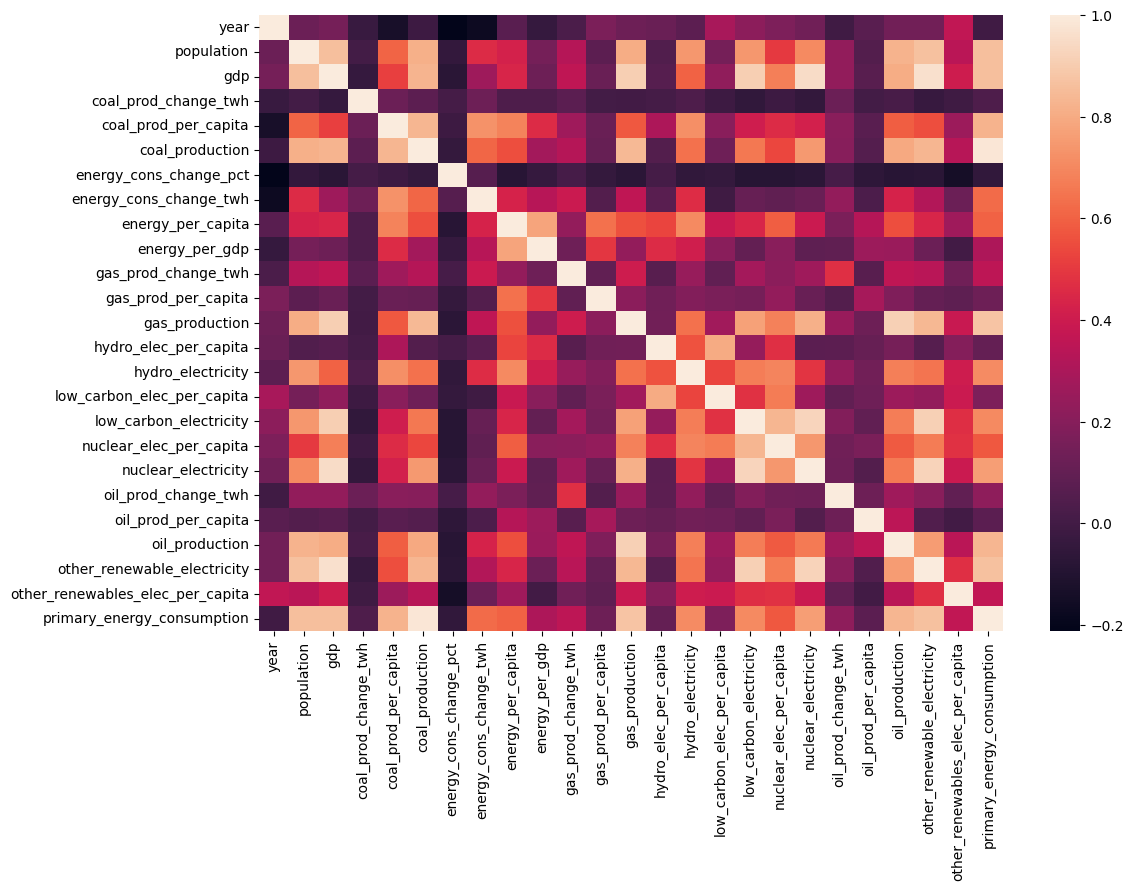

In [ ]:
#Shows the heatmap
#This map lets us understand correlation between variables
plt.figure(figsize=(12,8))
sns.heatmap(cleaned_csv_specific_continents.corr())

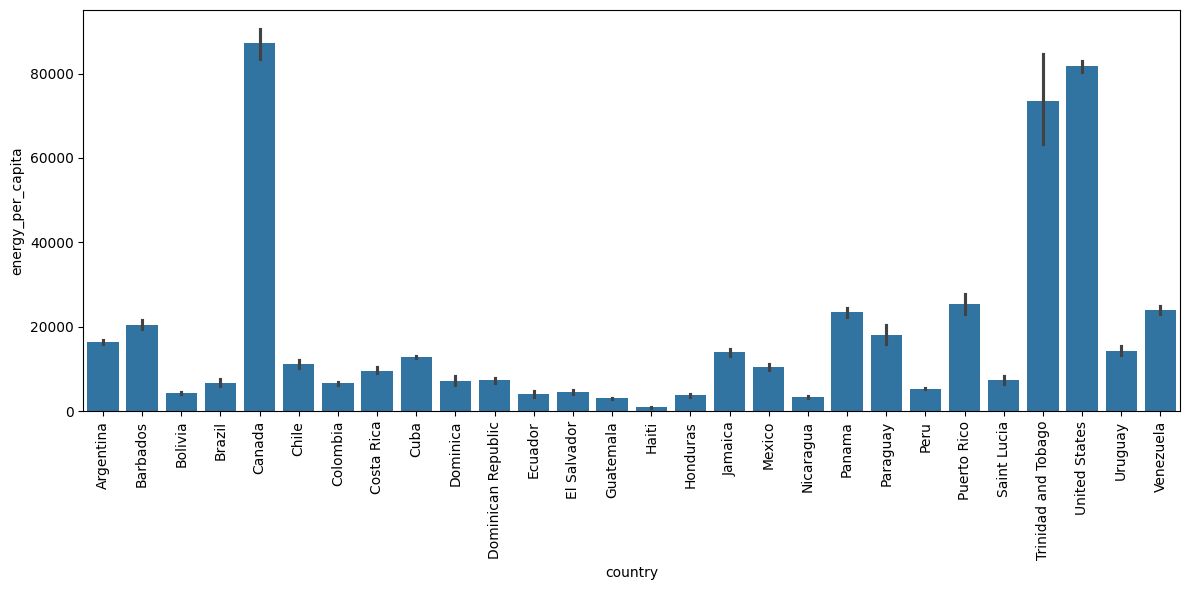

In [ ]:
#Plotting the barplot for country vs Energy Per Capita
plt.figure(figsize=(12, 6))
sns.barplot(data=cleaned_csv_specific_continents, x='country', y='energy_per_capita')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

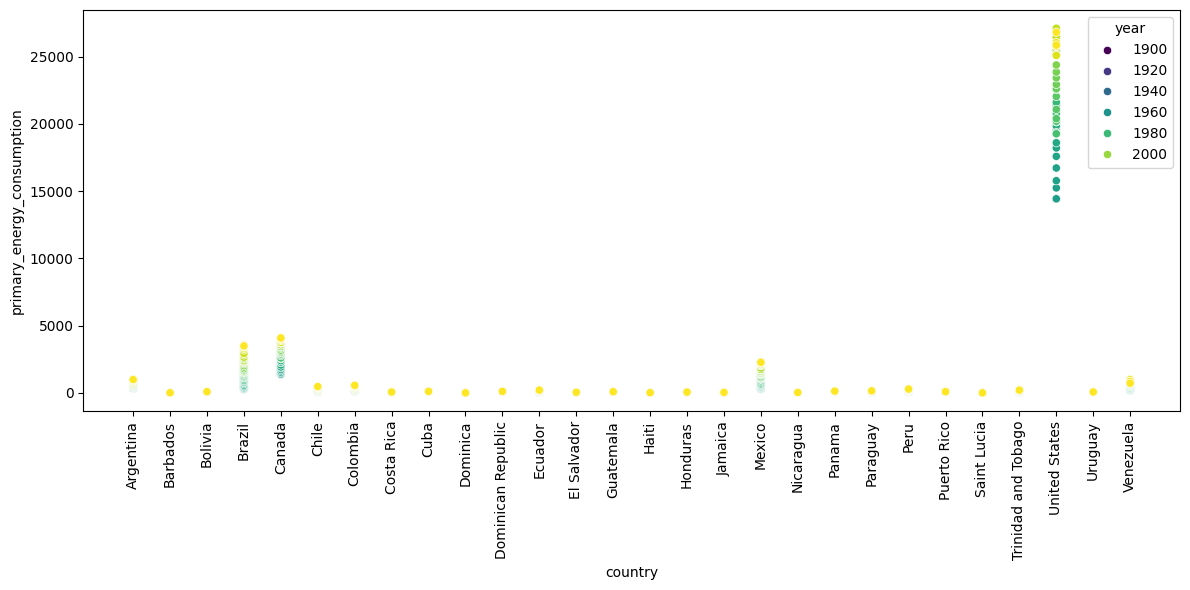

In [ ]:
#Plotting the scatterplot for country vs Primary Energy Consumption
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_csv_specific_continents, x='country', y='primary_energy_consumption',hue='year', palette='viridis')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

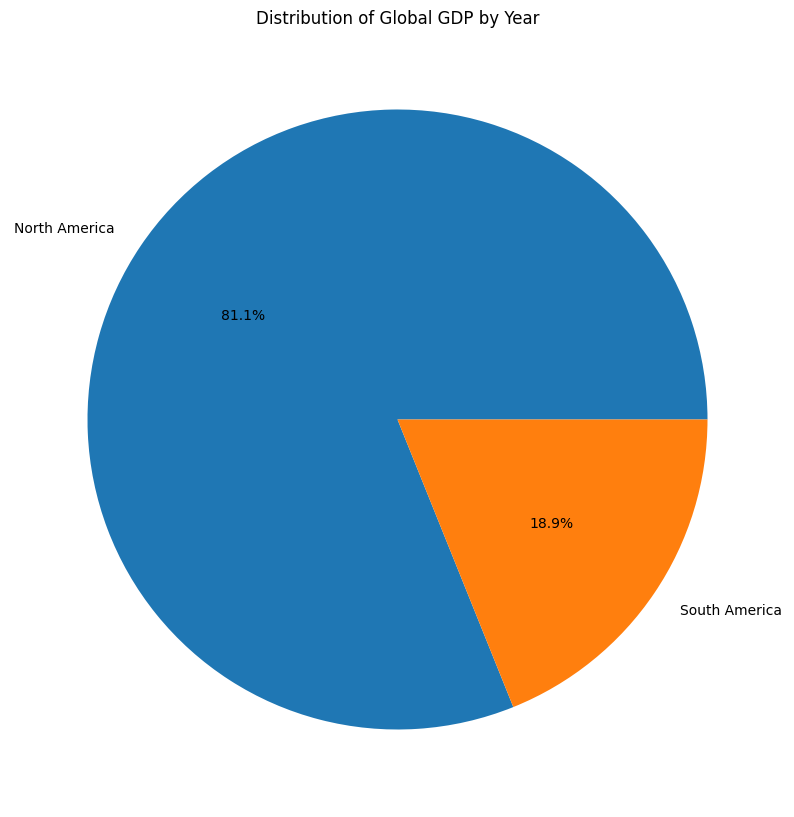

In [ ]:
#Plotting a pie chart for the distribution of GDP within the two focused continents
gdp_by_year = cleaned_csv_specific_continents.groupby('continent')['gdp'].sum()

plt.figure(figsize=(10, 16))
plt.pie(gdp_by_year, labels=gdp_by_year.index, autopct='%1.1f%%')
plt.title('Distribution of Global GDP by Year')
plt.show()

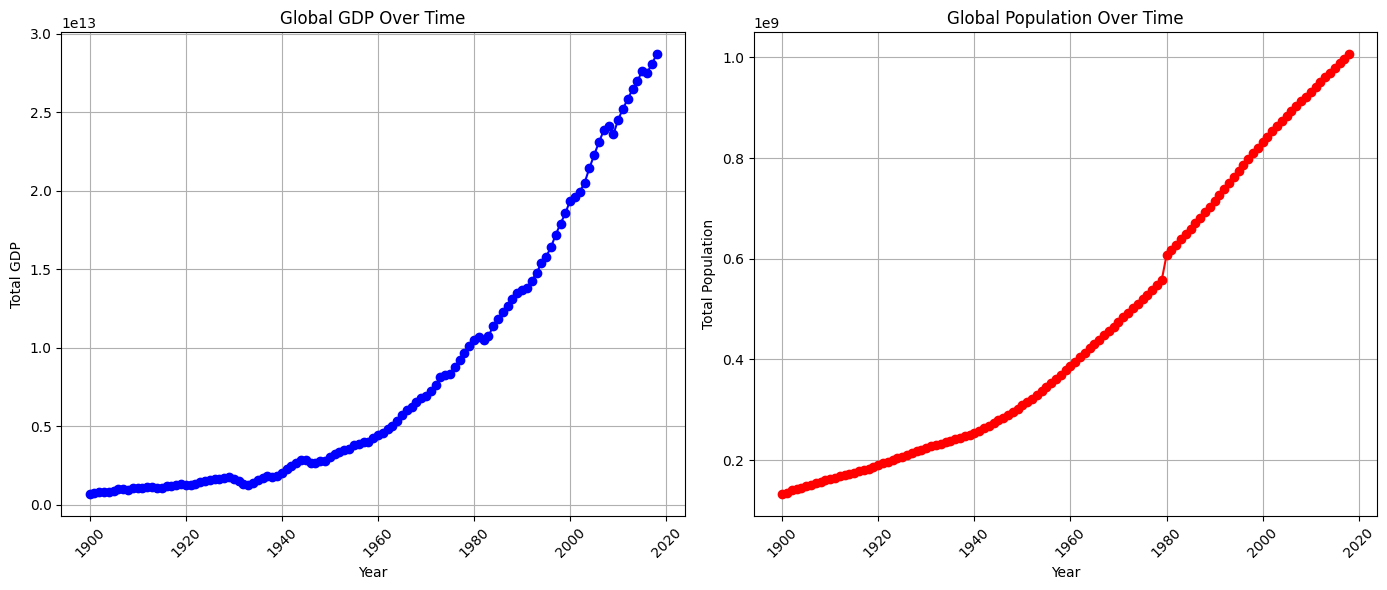

In [ ]:
#Plotting of GDP over time vs global population over time
gdp_population_by_year = cleaned_csv_specific_continents.groupby('year')[['gdp', 'population']].sum()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(gdp_population_by_year.index, gdp_population_by_year['gdp'], marker='o', linestyle='-', color='blue')
plt.title('Global GDP Over Time')
plt.xlabel('Year')
plt.ylabel('Total GDP')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(gdp_population_by_year.index, gdp_population_by_year['population'], marker='o', linestyle='-', color='red')
plt.title('Global Population Over Time')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-97-dc9d7e04e507>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


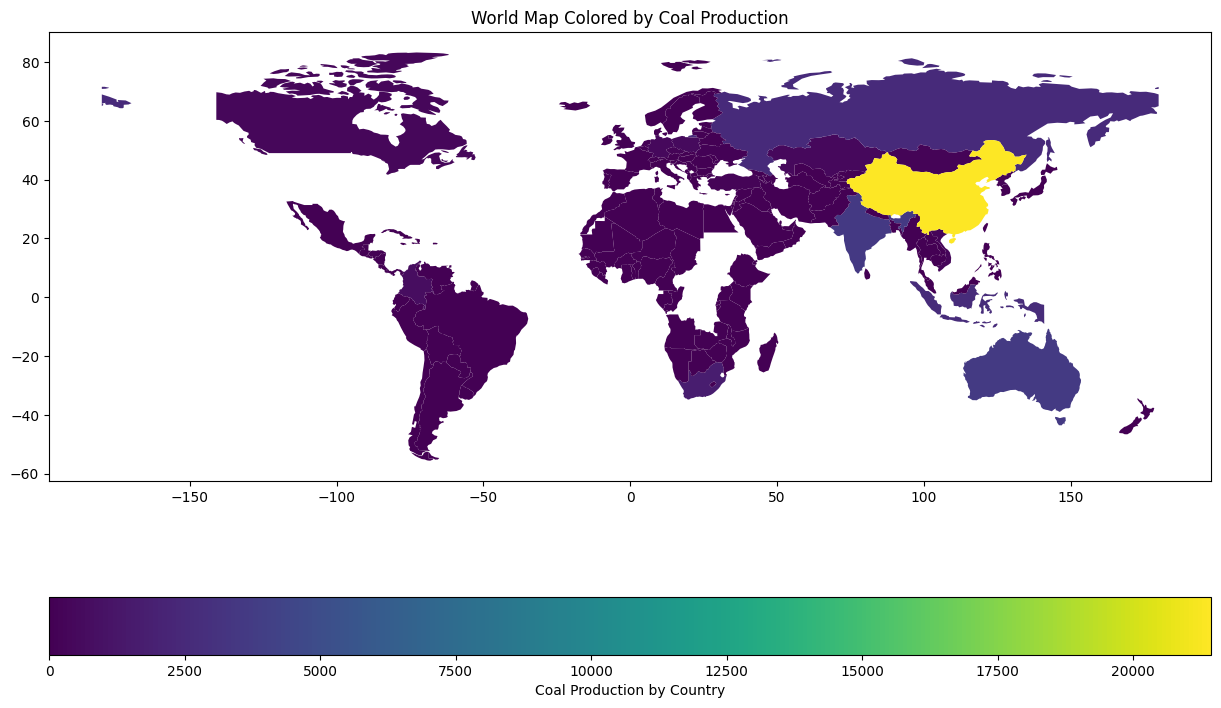

In [ ]:
#Plotting of every country and their coal production

gdp_by_country = cleaned_csv[cleaned_csv['year'] == cleaned_csv['year'].max()].groupby('country')['coal_production'].sum().reset_index()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world_gdp = world.merge(gdp_by_country, how="left", left_on="name", right_on="country")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_gdp.plot(column='coal_production', ax=ax, legend=True,
               legend_kwds={'label': "Coal Production by Country",
                            'orientation': "horizontal"})
plt.title('World Map Colored by Coal Production')
plt.show()


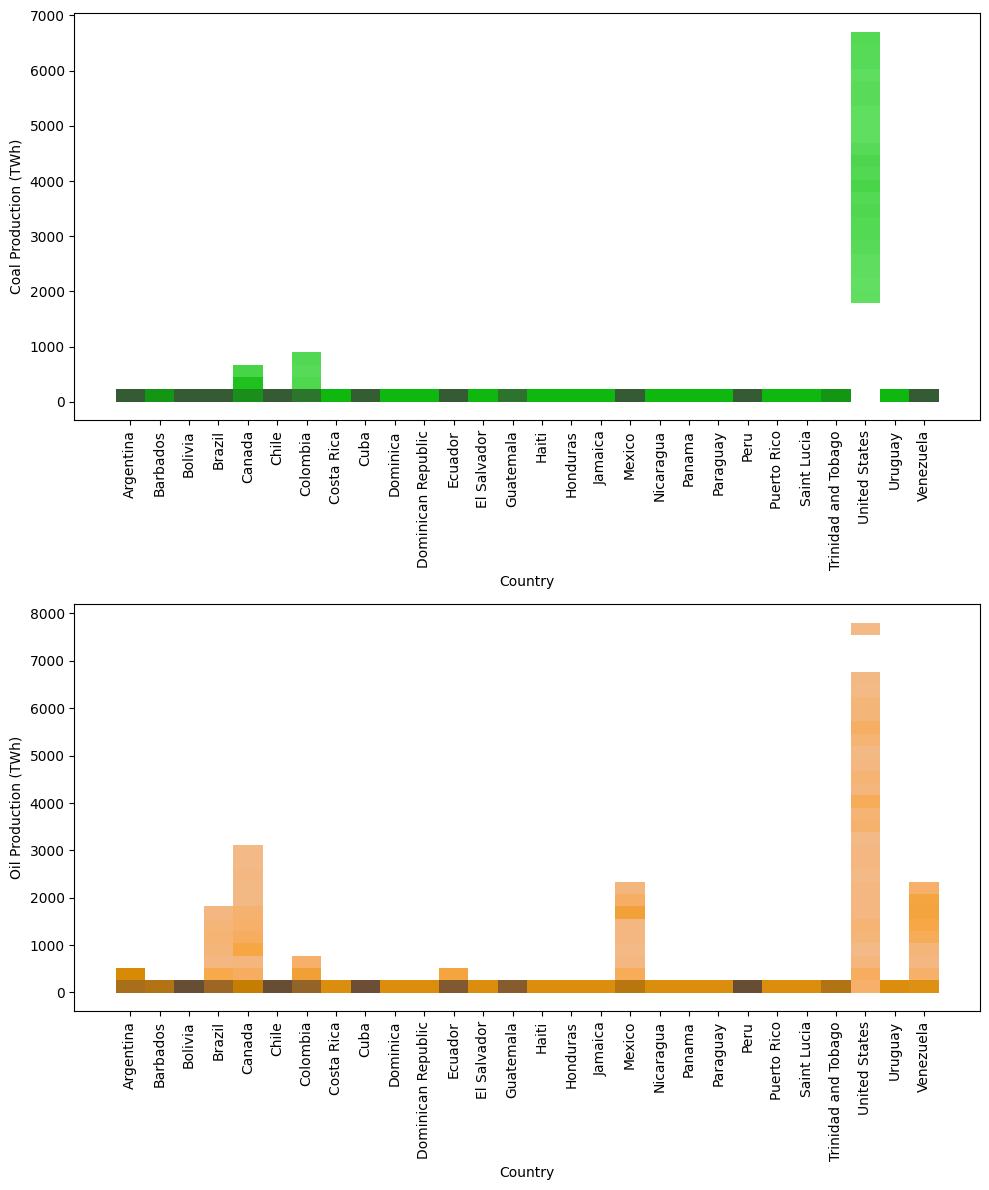

In [ ]:
#Plotting the focused data set vs Coal Production and Oil Production
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

sns.histplot(data=cleaned_csv_specific_continents, x='country', y='coal_production', bins=30, color='green', ax=ax[0], kde=True)
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Coal Production (TWh)')
ax[0].tick_params(axis='x', rotation=90)

sns.histplot(data=cleaned_csv_specific_continents, x='country', y='oil_production', bins=30, color='orange', ax=ax[1], kde=True)
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Oil Production (TWh)')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [ ]:
# plt.figure(figsize=(12, 6))
# sns.barplot(data=cleaned_csv_specific_continents, x='country', y='nuclear_production')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

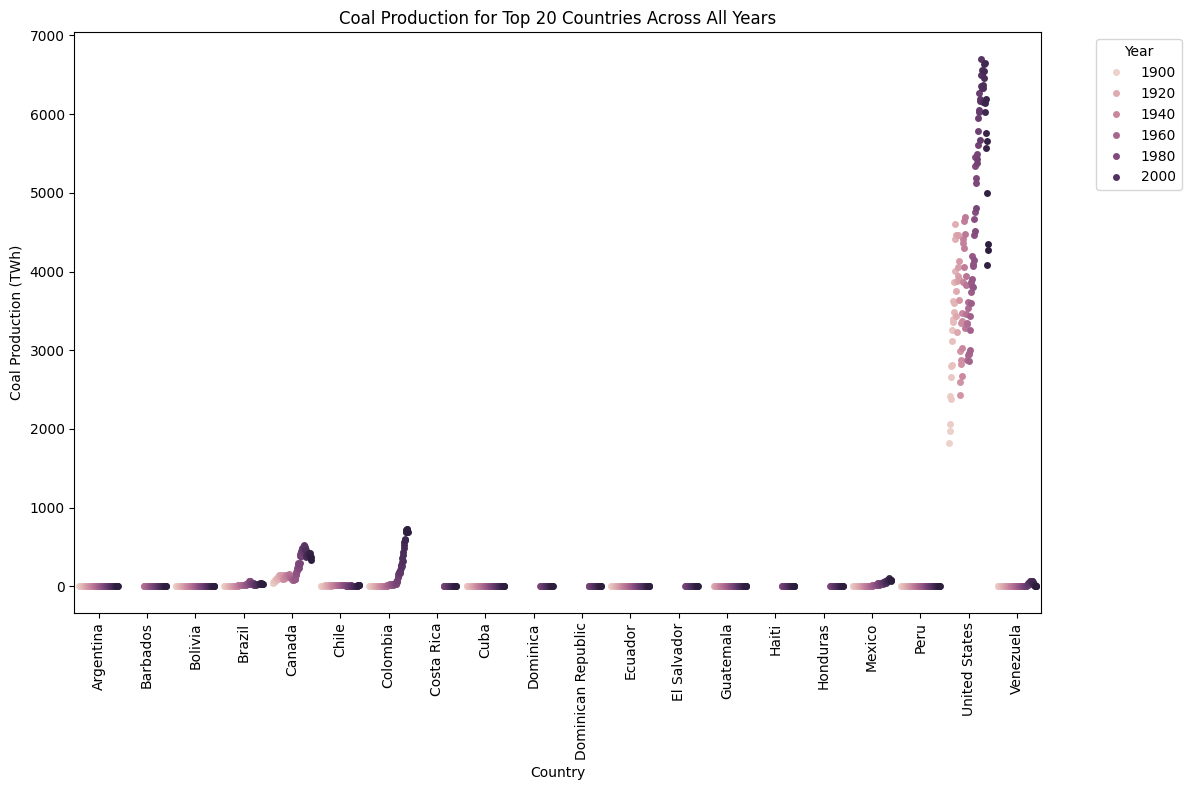

In [ ]:
# Plotting a swarm plot of the focused data set vs Coal Production
top_coal_countries = cleaned_csv_specific_continents.groupby('country')['coal_production'].mean().nlargest(20).reset_index()

filtered_data_for_swarm_all_years = cleaned_csv_specific_continents[cleaned_csv_specific_continents['country'].isin(top_coal_countries['country'])]

plt.figure(figsize=(12, 8))
sns.swarmplot(x='country', y='coal_production', hue='year', data=filtered_data_for_swarm_all_years, dodge=True)
plt.title('Coal Production for Top 20 Countries Across All Years')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Coal Production (TWh)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

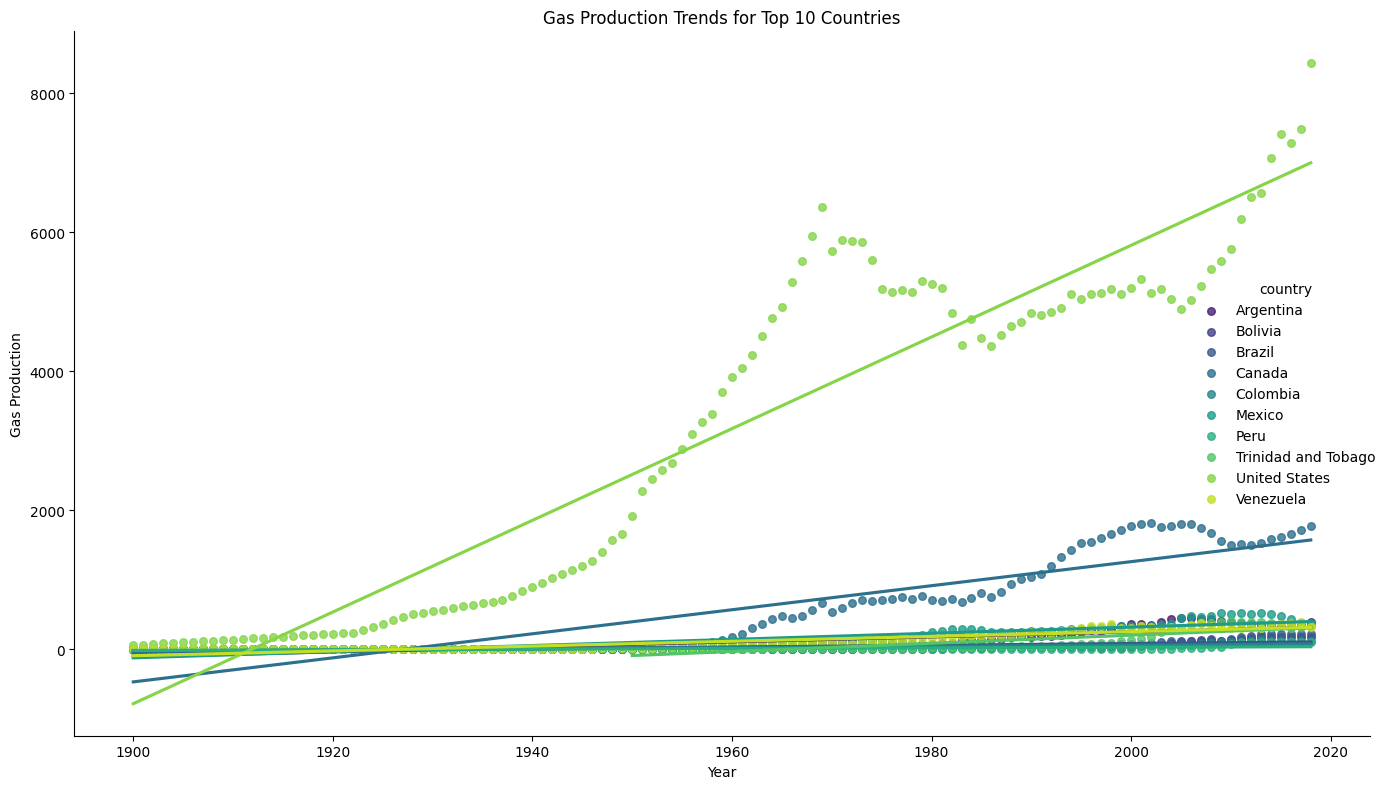

In [ ]:
#plotting an lm plot of gas production vs time
most_recent_year = cleaned_csv_specific_continents['year'].max()
top_countries = cleaned_csv_specific_continents[cleaned_csv_specific_continents['year'] == most_recent_year].groupby('country')['gas_production'].sum().nlargest(10).index

filtered_data = cleaned_csv_specific_continents[cleaned_csv_specific_continents['country'].isin(top_countries)]

plt.figure(figsize = (12,8))
sns.lmplot(data=filtered_data, x='year', y='gas_production', hue='country', palette='viridis', height=8, aspect=1.5, ci=None, scatter_kws={'s': 30})

plt.title('Gas Production Trends for Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Gas Production')
plt.tight_layout()
plt.show()

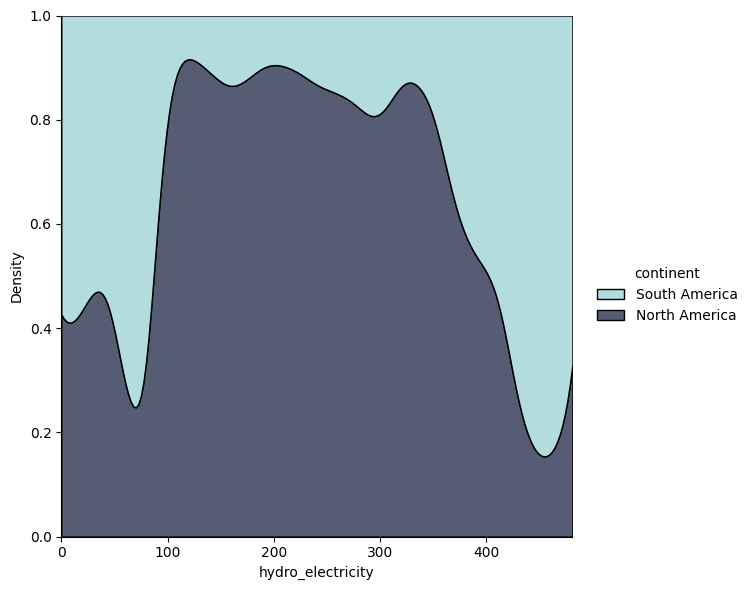

In [ ]:
#Plotting a density plot of hydro electricity between the two focused continents

sns.displot(data=cleaned_csv_specific_continents,x="hydro_electricity", hue="continent",kind="kde", height=6,multiple="fill", clip=(0, None),palette="ch:rot=-.25,hue=1,light=.75",)

In [ ]:
#Saves the united states data
united_states_data = cleaned_csv_specific_continents[cleaned_csv_specific_continents['country'] == 'United States']

<ipython-input-72-c313a14b7a2c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="country", y="nuclear_electricity",
<ipython-input-72-c313a14b7a2c>:1: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(x="country", y="nuclear_electricity",


<Axes: xlabel='country', ylabel='nuclear_electricity'>

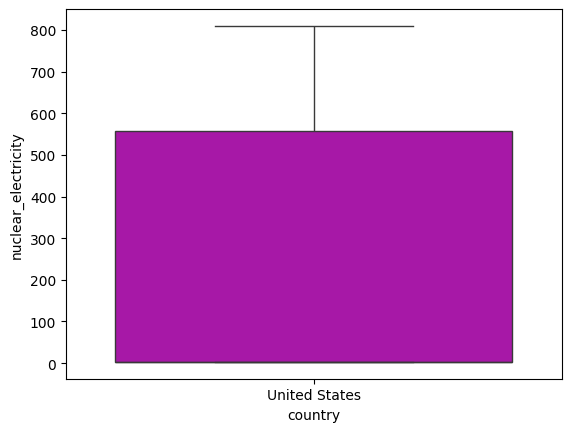

In [ ]:
#Plots a boxplot of the nuclear energy in the united states
sns.boxplot(x="country", y="nuclear_electricity",
             palette=["m", "g"],
            data=united_states_data)


##Preprocessing Steps

In [ ]:
# one hot encoding
one_hot_encoded_data = pd.get_dummies(cleaned_csv_specific_continents, columns = ['country'])
print(one_hot_encoded_data)

       year  population           gdp  coal_prod_change_twh  \
281    1900   4685089.0  2.046512e+10                -0.000   
282    1901   4855502.0  2.133270e+10                -0.000   
283    1902   5036658.0  2.087368e+10                -0.000   
284    1903   5229108.0  2.402843e+10                -0.000   
285    1904   5428911.0  2.672760e+10                -0.000   
...     ...         ...           ...                   ...   
10618  2014  30193260.0  6.002817e+11                -3.655   
10619  2015  30529722.0  5.606408e+11                 0.009   
10620  2016  30741464.0  4.577605e+11                -0.447   
10621  2017  30563430.0  3.859235e+11                -0.249   
10622  2018  29825652.0  3.100745e+11                -0.239   

       coal_prod_per_capita  coal_production  energy_cons_change_pct  \
281                  -0.178           -0.005                   3.243   
282                  -0.178           -0.005                   3.243   
283                  -0.178

In [ ]:

one_hot_encoded_data['Years'] = one_hot_encoded_data['year'] - one_hot_encoded_data['year'].min()
print(one_hot_encoded_data)

       year  population           gdp  coal_prod_change_twh  \
281    1900   4685089.0  2.046512e+10                -0.000   
282    1901   4855502.0  2.133270e+10                -0.000   
283    1902   5036658.0  2.087368e+10                -0.000   
284    1903   5229108.0  2.402843e+10                -0.000   
285    1904   5428911.0  2.672760e+10                -0.000   
...     ...         ...           ...                   ...   
10618  2014  30193260.0  6.002817e+11                -3.655   
10619  2015  30529722.0  5.606408e+11                 0.009   
10620  2016  30741464.0  4.577605e+11                -0.447   
10621  2017  30563430.0  3.859235e+11                -0.249   
10622  2018  29825652.0  3.100745e+11                -0.239   

       coal_prod_per_capita  coal_production  energy_cons_change_pct  \
281                  -0.178           -0.005                   3.243   
282                  -0.178           -0.005                   3.243   
283                  -0.178

In [ ]:
one_hot_encoded_data = one_hot_encoded_data.drop(['year'],axis=1)

In [ ]:
one_hot_encoded_data = one_hot_encoded_data.drop(['continent'],axis=1)

In [ ]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(one_hot_encoded_data)

features_scaled_df = pd.DataFrame(features_scaled, columns=one_hot_encoded_data.columns)
print(features_scaled_df)

      population       gdp  coal_prod_change_twh  coal_prod_per_capita  \
0      -0.408819 -0.245103             -0.019154             -0.357826   
1      -0.405445 -0.244614             -0.019154             -0.357826   
2      -0.401858 -0.244873             -0.019154             -0.357826   
3      -0.398048 -0.243094             -0.019154             -0.357826   
4      -0.394093 -0.241571             -0.019154             -0.357826   
...          ...       ...                   ...                   ...   
2165    0.096195  0.081912             -0.060150             -0.323559   
2166    0.102856  0.059554             -0.019053             -0.323894   
2167    0.107048  0.001530             -0.024167             -0.326349   
2168    0.103523 -0.038986             -0.021947             -0.327406   
2169    0.088917 -0.081764             -0.021834             -0.327871   

      coal_production  energy_cons_change_pct  energy_cons_change_twh  \
0           -0.252549               -0